# MUSIC RECOMMENDATION SYSTEM

## Importing The Libraries

In [1]:
!pip install missingno

In [4]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
%matplotlib inline

## Setting The Rows & Colmuns

In [40]:
pd.set_option('display.max_rows', 101)
pd.set_option('display.max_columns',17)

## Loading The Data


## Working On ''Featuresdf'' Dataset

In [5]:
dataset=pd.read_csv('featuresdf.csv')
print(dataset)

                       id                                name  \
0   7qiZfU4dY1lWllzX7mPBI                        Shape of You   
1   5CtI0qwDJkDQGwXD1H1cL                   Despacito - Remix   
2   4aWmUDTfIPGksMNLV2rQP  Despacito (Featuring Daddy Yankee)   
3   6RUKPb4LETWmmr3iAEQkt            Something Just Like This   
4   3DXncPQOG4VBw3QHh3S81                         I'm the One   
..                    ...                                 ...   
95  1PSBzsahR2AKwLJgx8ehB    Bad Things (with Camila Cabello)   
96  0QsvXIfqM0zZoerQfsI9l                   Don't Let Me Down   
97  7mldq42yDuxiUNn08nvzH               Body Like A Back Road   
98  7i2DJ88J7jQ8K7zqFX2fW                        Now Or Never   
99  1j4kHkkpqZRBwE0A4CN4Y         Dusk Till Dawn - Radio Edit   

              artists  danceability  energy   key  loudness  mode  \
0          Ed Sheeran         0.825   0.652   1.0    -3.183   0.0   
1          Luis Fonsi         0.694   0.815   2.0    -4.328   1.0   
2          L

In [42]:
print(dataset.columns)

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


## Comparing The Tracks

In [43]:
musictracks = dataset.pivot_table(index = 'artists',columns = 'name',values='tempo')
print(musictracks)

name                1-800-273-8255  24K Magic  2U (feat. Justin Bieber)  \
artists                                                                   
21 Savage                      NaN        NaN                       NaN   
AJR                            NaN        NaN                       NaN   
Alessia Cara                   NaN        NaN                       NaN   
Alok                           NaN        NaN                       NaN   
Ariana Grande                  NaN        NaN                       NaN   
Axwell /\ Ingrosso             NaN        NaN                       NaN   
Big Sean                       NaN        NaN                       NaN   
Bruno Mars                     NaN     106.97                       NaN   
CNCO                           NaN        NaN                       NaN   
Calvin Harris                  NaN        NaN                       NaN   
Camila Cabello                 NaN        NaN                       NaN   
Charlie Puth             

In [44]:
musictracks.head(20)

name,1-800-273-8255,24K Magic,2U (feat. Justin Bieber),Ahora Dice,All Night,Attention,Bad Things (with Camila Cabello),Bad and Boujee (feat. Lil Uzi Vert),...,Wild Thoughts,XO TOUR Llif3,You Don't Know Me - Radio Edit,Young Dumb & Broke,Your Song,goosebumps,iSpy (feat. Lil Yachty),rockstar
artists,,,,,,,,,,,,,,,,,
21 Savage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AJR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alessia Cara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ariana Grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axwell /\ Ingrosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Big Sean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bruno Mars,NaN,106.97,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
musictracks.describe()

name,1-800-273-8255,24K Magic,2U (feat. Justin Bieber),Ahora Dice,All Night,Attention,Bad Things (with Camila Cabello),Bad and Boujee (feat. Lil Uzi Vert),...,Wild Thoughts,XO TOUR Llif3,You Don't Know Me - Radio Edit,Young Dumb & Broke,Your Song,goosebumps,iSpy (feat. Lil Yachty),rockstar
count,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,...,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000
mean,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
25%,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
50%,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
75%,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
max,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,...,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772


In [11]:
dataset.sort_values('tempo',ascending=True).head(5)
dataset.sort_values('tempo',ascending=True).iloc[:,-1]

45    4.0
94    4.0
46    4.0
4     4.0
69    4.0
     ... 
61    4.0
99    4.0
31    4.0
63    4.0
52    4.0
Name: time_signature, Length: 100, dtype: float64

## Analysing Data

In [47]:
dataset.head(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [48]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


In [49]:
dataset = dataset.sample(frac=0.1, random_state = 1)

In [50]:
dataset.shape

(10, 16)

In [51]:
dataset.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## Feature  Engineering The Data

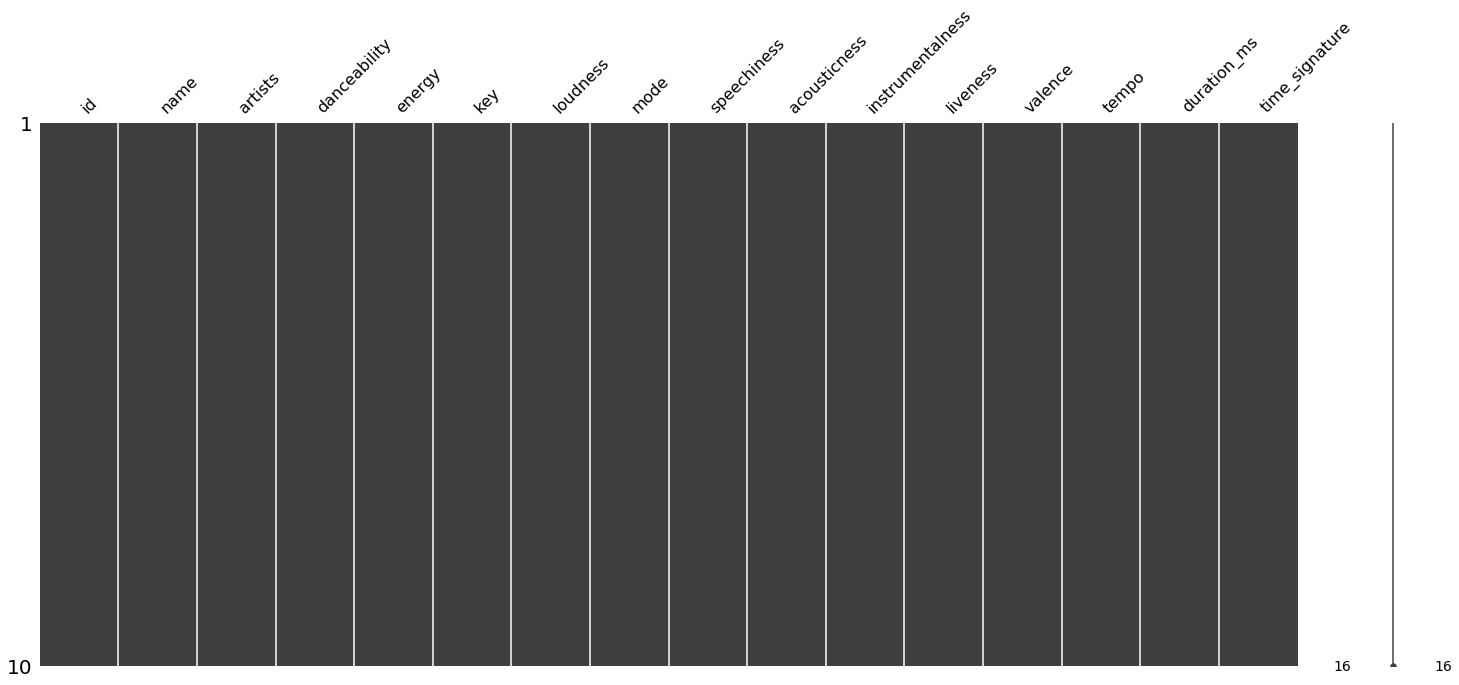

In [52]:
ms.matrix(dataset)

In [53]:
dataset.tail(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
80,6875MeXyCW0wLyT72Eetm,Starving,Hailee Steinfeld,0.721,0.626,4.0,-4.200,1.0,0.1230,0.40200,0.000000,0.1020,0.558,99.914,181933.0,4.0
84,3QwBODjSEzelZyVjxPOHd,Otra Vez (feat. J Balvin),Zion & Lennox,0.832,0.772,10.0,-5.429,1.0,0.1000,0.05590,0.000486,0.4400,0.704,96.016,209453.0,4.0
33,7tr2za8SQg2CI8EDgrdtN,Slide,Calvin Harris,0.736,0.795,1.0,-3.299,0.0,0.0545,0.49800,0.000001,0.2540,0.511,104.066,230813.0,4.0
81,3AEZUABDXNtecAOSC1qTf,Reggaetón Lento (Bailemos),CNCO,0.761,0.838,4.0,-3.073,0.0,0.0502,0.40000,0.000000,0.1760,0.710,93.974,222560.0,4.0
93,7nZmah2llfvLDiUjm0kiy,Friends (with BloodPop®),Justin Bieber,0.744,0.739,8.0,-5.350,1.0,0.0387,0.00459,0.000000,0.3060,0.649,104.990,189467.0,4.0
17,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834,2.0,-4.868,1.0,0.0989,0.02320,0.000011,0.1400,0.471,135.007,261154.0,4.0
36,7hDc8b7IXETo14hHIHdnh,Passionfruit,Drake,0.809,0.463,11.0,-11.377,1.0,0.0396,0.25600,0.085000,0.1090,0.364,111.980,298941.0,4.0
82,3E2Zh20GDCR9B1EYjfXWy,Weak,AJR,0.673,0.637,5.0,-4.518,1.0,0.0429,0.13700,0.000000,0.1840,0.678,123.980,201160.0,4.0
69,0SGkqnVQo9KPytSri1H6c,Bounce Back,Big Sean,0.770,0.567,2.0,-5.698,1.0,0.1750,0.10500,0.000000,0.1250,0.260,81.477,222360.0,4.0
65,2QbFClFyhMMtiurUjuQlA,Don't Wanna Know (feat. Kendrick Lamar),Maroon 5,0.775,0.617,7.0,-6.166,1.0,0.0701,0.34100,0.000000,0.0985,0.485,100.048,214265.0,4.0


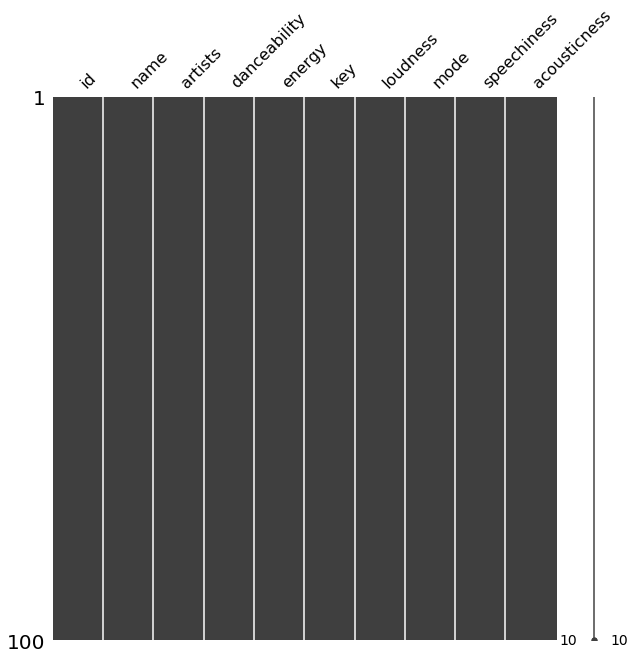

In [36]:
ms.matrix(dataset.iloc[:, 0:10],figsize=(10,10))

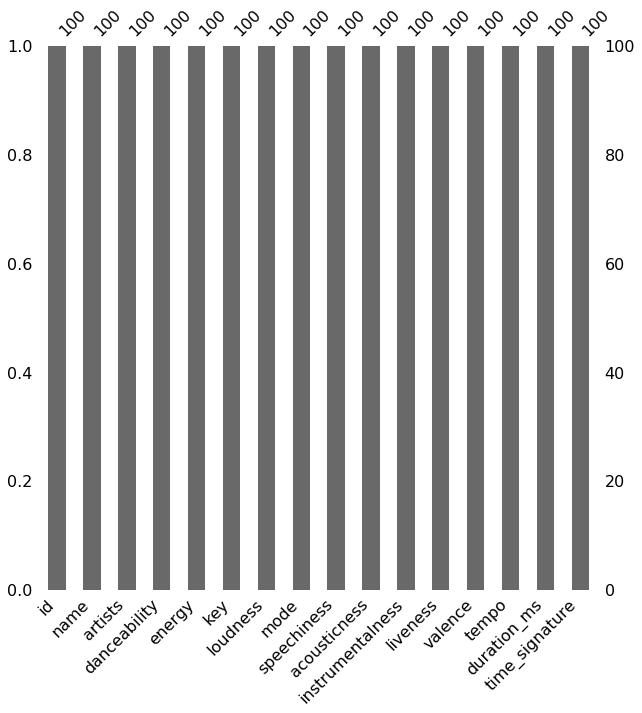

In [34]:
ms.bar(dataset,figsize=(10,10))

In [56]:
dataset = np.random.normal(160, 10, 200)
print(dataset)

[157.25058685 174.95819707 163.93001854 138.50156232 162.12517771
 165.70229294 164.73761376 159.2648752  160.84491832 149.05674357
 166.77255152 141.2087806  155.42971501 161.83340184 174.16302566
 162.87917736 162.07691866 154.93296574 166.5293596  161.60710995
 176.32624055 155.46197697 141.97812381 162.30417533 161.69814276
 169.84015701 147.89570288 141.58454345 169.09907637 145.01366725
 146.6845165  152.55971948 154.3333238  158.38923684 154.34688293
 165.2278705  181.22691547 157.55487863 177.04383808 160.76821415
 157.47099956 174.86801538 145.02046955 153.51242015 167.67681351
 161.42253668 153.24229424 161.05656689 158.38108131 152.28710442
 156.73503923 160.16190667 172.02444542 163.42285556 167.48894308
 155.20169598 155.78388885 160.2491928  161.08814207 155.52634141
 187.41536268 164.61663076 152.20843527 156.5713475  158.84737151
 155.52889889 146.26449245 176.84860103 138.56942667 141.55794877
 168.18598744 152.63833897 164.82564602 150.62982601 154.60348274
 159.08398

## Plotting the data with graphs

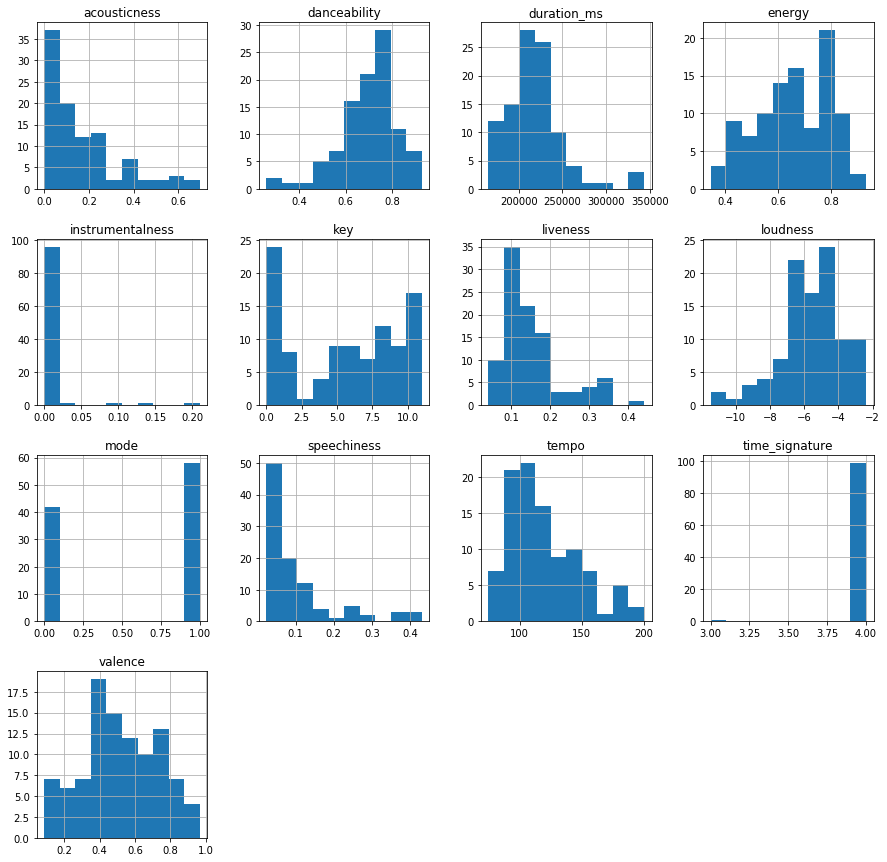

In [31]:
dataset.hist(figsize=(15,15))
plt.show()

In [32]:
final = shuffle(dataset)

In [17]:
print(final)

                       id                             name         artists  \
22  5uCax9HTNlzGybIStD3vD             Say You Won't Let Go    James Arthur   
64  1louJpMmzEicAn7lzDalP  No Promises (feat. Demi Lovato)     Cheat Codes   
26  0afhq8XCExXpqazXczTSv                      Galway Girl      Ed Sheeran   
25  6D0b04NJIKfEMg040WioJ                           Issues  Julia Michaels   
62  00lNx0OcTJrS3MKHcB80H   You Don't Know Me - Radio Edit       Jax Jones   
..                    ...                              ...             ...   
68  2cnKEkpVUSV4wnjQiTWfH                 Escápate Conmigo           Wisin   
79  0CokSRCu5hZgPxcZBaEzV     Glorious (feat. Skylar Grey)      Macklemore   
6   3eR23VReFzcdmS7TYCrhC  It Ain't Me (with Selena Gomez)            Kygo   
10  7GX5flRQZVHRAGd6B4TmD                    XO TOUR Llif3    Lil Uzi Vert   
84  3QwBODjSEzelZyVjxPOHd        Otra Vez (feat. J Balvin)   Zion & Lennox   

    danceability  energy   key  loudness  mode  speechiness  ac

## Train,Test & Predicting the data

In [49]:
from sklearn.model_selection import train_test_split  

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
print(X_train)

[[  0.637  -6.763]
 [  0.721  -4.2  ]
 [  0.789  -7.844]
 [  0.747  -3.181]
 [  0.927  -9.433]
 [  0.584  -7.786]
 [  0.72   -4.068]
 [  0.703  -4.661]
 [  0.448  -5.363]
 [  0.697  -6.288]
 [  0.694  -4.328]
 [  0.683  -5.535]
 [  0.893  -3.105]
 [  0.676  -4.068]
 [  0.609  -4.284]
 [  0.627  -4.215]
 [  0.461  -4.868]
 [  0.599  -6.312]
 [  0.869  -5.595]
 [  0.904  -6.842]
 [  0.855  -4.093]
 [  0.818  -4.282]
 [  0.825  -3.183]
 [  0.771  -6.258]
 [  0.748  -5.599]
 [  0.744  -2.396]
 [  0.653  -6.428]
 [  0.629  -7.733]
 [  0.857  -4.035]
 [  0.476  -5.309]
 [  0.732  -6.366]
 [  0.681  -7.028]
 [  0.314  -9.601]
 [  0.704  -6.923]
 [  0.731  -5.126]
 [  0.752  -7.621]
 [  0.671  -3.094]
 [  0.832  -5.429]
 [  0.833  -8.795]
 [  0.544  -5.098]
 [  0.779  -4.305]
 [  0.707  -4.581]
 [  0.768  -4.323]
 [  0.731  -7.226]
 [  0.658  -4.902]
 [  0.77   -5.698]
 [  0.543  -4.915]
 [  0.884  -8.228]
 [  0.798  -6.351]
 [  0.647  -3.515]
 [  0.706  -6.864]
 [  0.577  -6.594]
 [  0.761  -

In [67]:
print(X_test)

[[ 0.624 -3.374]
 [ 0.49  -6.237]
 [ 0.66  -4.757]
 [ 0.684 -3.297]
 [ 0.52  -3.093]
 [ 0.744 -5.35 ]
 [ 0.696 -3.862]
 [ 0.611 -7.607]
 [ 0.791 -5.886]
 [ 0.675 -4.761]
 [ 0.644 -5.002]
 [ 0.708 -5.516]
 [ 0.773 -6.378]
 [ 0.774 -4.432]
 [ 0.726 -5.043]
 [ 0.768 -5.94 ]
 [ 0.358 -7.398]
 [ 0.744 -6.327]
 [ 0.736 -3.299]
 [ 0.853 -4.961]
 [ 0.746 -4.209]
 [ 0.876 -6.054]
 [ 0.617 -6.769]
 [ 0.841 -3.37 ]
 [ 0.746 -6.745]
 [ 0.927 -5.313]
 [ 0.64  -6.596]
 [ 0.258 -6.593]
 [ 0.673 -4.518]
 [ 0.698 -8.279]]


In [68]:
print(y_train)

[[ 0.637  1.   ]
 [ 0.721  4.   ]
 [ 0.789 11.   ]
 [ 0.747  8.   ]
 [ 0.927  9.   ]
 [ 0.584  1.   ]
 [ 0.72   9.   ]
 [ 0.703  7.   ]
 [ 0.448  0.   ]
 [ 0.697  9.   ]
 [ 0.694  2.   ]
 [ 0.683  8.   ]
 [ 0.893 11.   ]
 [ 0.676  0.   ]
 [ 0.609  7.   ]
 [ 0.627  6.   ]
 [ 0.461  2.   ]
 [ 0.599  8.   ]
 [ 0.869  6.   ]
 [ 0.904  1.   ]
 [ 0.855  1.   ]
 [ 0.818  1.   ]
 [ 0.825  1.   ]
 [ 0.771  9.   ]
 [ 0.748  8.   ]
 [ 0.744  6.   ]
 [ 0.653  2.   ]
 [ 0.629  5.   ]
 [ 0.857  2.   ]
 [ 0.476  8.   ]
 [ 0.732 11.   ]
 [ 0.681  7.   ]
 [ 0.314  9.   ]
 [ 0.704 11.   ]
 [ 0.731  0.   ]
 [ 0.752  9.   ]
 [ 0.671  0.   ]
 [ 0.832 10.   ]
 [ 0.833  2.   ]
 [ 0.544  8.   ]
 [ 0.779 10.   ]
 [ 0.707  0.   ]
 [ 0.768  7.   ]
 [ 0.731  5.   ]
 [ 0.658  6.   ]
 [ 0.77   2.   ]
 [ 0.543 11.   ]
 [ 0.884  8.   ]
 [ 0.798  1.   ]
 [ 0.647 11.   ]
 [ 0.706  8.   ]
 [ 0.577  5.   ]
 [ 0.761  4.   ]
 [ 0.736  1.   ]
 [ 0.548  8.   ]
 [ 0.775  7.   ]
 [ 0.743  1.   ]
 [ 0.679  5.   ]
 [ 0.573  8.  

In [69]:
print(y_test)

[[ 0.624  9.   ]
 [ 0.49   4.   ]
 [ 0.66   2.   ]
 [ 0.684  9.   ]
 [ 0.52   4.   ]
 [ 0.744  8.   ]
 [ 0.696  1.   ]
 [ 0.611  6.   ]
 [ 0.791  1.   ]
 [ 0.675  2.   ]
 [ 0.644  5.   ]
 [ 0.708  6.   ]
 [ 0.773  9.   ]
 [ 0.774  3.   ]
 [ 0.726  6.   ]
 [ 0.768  0.   ]
 [ 0.358 10.   ]
 [ 0.744  1.   ]
 [ 0.736  1.   ]
 [ 0.853  1.   ]
 [ 0.746 11.   ]
 [ 0.876 11.   ]
 [ 0.617 11.   ]
 [ 0.841  7.   ]
 [ 0.746  7.   ]
 [ 0.927 11.   ]
 [ 0.64   0.   ]
 [ 0.258 11.   ]
 [ 0.673  5.   ]
 [ 0.698  5.   ]]


In [51]:
from sklearn.linear_model import LinearRegression  

In [52]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [54]:
print(regressor.intercept_)

[-1.11022302e-16  5.95050905e+00]


In [55]:
print(regressor.coef_)

[[ 1.00000000e+00 -8.28368976e-19]
 [-3.85543825e-01 -3.15280362e-02]]


In [61]:
print(X_test)

[[ 0.624 -3.374]
 [ 0.49  -6.237]
 [ 0.66  -4.757]
 [ 0.684 -3.297]
 [ 0.52  -3.093]
 [ 0.744 -5.35 ]
 [ 0.696 -3.862]
 [ 0.611 -7.607]
 [ 0.791 -5.886]
 [ 0.675 -4.761]
 [ 0.644 -5.002]
 [ 0.708 -5.516]
 [ 0.773 -6.378]
 [ 0.774 -4.432]
 [ 0.726 -5.043]
 [ 0.768 -5.94 ]
 [ 0.358 -7.398]
 [ 0.744 -6.327]
 [ 0.736 -3.299]
 [ 0.853 -4.961]]


In [62]:
X_pred=regressor.predict(y_test)
print(X_pred)

[[0.624      5.42617738]
 [0.49       5.63548043]
 [0.66       5.63299405]
 [0.684      5.40304475]
 [0.52       5.62391412]
 [0.744      5.41144016]
 [0.696      5.65064251]
 [0.611      5.52577356]
 [0.791      5.61401585]
 [0.675      5.6272109 ]
 [0.644      5.54457865]
 [0.708      5.48837581]
 [0.773      5.36873135]
 [0.774      5.55751402]
 [0.726      5.48143602]
 [0.768      5.65441139]
 [0.358      5.497204  ]
 [0.744      5.63213641]
 [0.736      5.63522076]
 [0.853      5.59011213]]


In [57]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[0.624      5.8163053 ]
 [0.49       5.95823294]
 [0.66       5.846029  ]
 [0.684      5.79074501]
 [0.52       5.84754248]
 [0.744      5.83233944]
 [0.696      5.80393182]
 [0.611      5.95477555]
 [0.791      5.83111791]
 [0.675      5.84037195]
 [0.644      5.85992207]
 [0.708      5.85145267]
 [0.773      5.85356949]
 [0.774      5.79183039]
 [0.726      5.82960012]
 [0.768      5.84168793]
 [0.358      6.04572877]
 [0.744      5.86314233]
 [0.736      5.77075979]
 [0.853      5.77805076]]


## Applying k-means clustering 

In [44]:
X = dataset.iloc[:, [3,6]].values
print(X)

[[  0.825  -3.183]
 [  0.694  -4.328]
 [  0.66   -4.757]
 [  0.617  -6.769]
 [  0.609  -4.284]
 [  0.904  -6.842]
 [  0.64   -6.596]
 [  0.726  -5.043]
 [  0.853  -4.961]
 [  0.735  -8.374]
 [  0.732  -6.366]
 [  0.653  -6.428]
 [  0.679  -5.024]
 [  0.774  -4.432]
 [  0.833  -8.795]
 [  0.627  -4.215]
 [  0.696  -3.862]
 [  0.461  -4.868]
 [  0.72   -4.068]
 [  0.779  -4.305]
 [  0.543  -4.915]
 [  0.6    -4.749]
 [  0.358  -7.398]
 [  0.857  -4.035]
 [  0.744  -6.327]
 [  0.706  -6.864]
 [  0.624  -3.374]
 [  0.584  -7.786]
 [  0.748  -5.599]
 [  0.707  -4.581]
 [  0.768  -5.94 ]
 [  0.681  -7.028]
 [  0.671  -3.094]
 [  0.736  -3.299]
 [  0.771  -6.258]
 [  0.629  -7.733]
 [  0.809 -11.377]
 [  0.577  -6.594]
 [  0.869  -5.595]
 [  0.548  -5.827]
 [  0.599  -6.312]
 [  0.676  -4.068]
 [  0.893  -3.105]
 [  0.746  -4.209]
 [  0.755  -4.502]
 [  0.746  -6.745]
 [  0.736 -11.462]
 [  0.852  -2.921]
 [  0.927  -5.313]
 [  0.768  -4.323]
 [  0.744  -2.396]
 [  0.927  -9.433]
 [  0.476  -

In [43]:
y = dataset.iloc[:, [3,5]].values
print(y)

[[ 0.825  1.   ]
 [ 0.694  2.   ]
 [ 0.66   2.   ]
 [ 0.617 11.   ]
 [ 0.609  7.   ]
 [ 0.904  1.   ]
 [ 0.64   0.   ]
 [ 0.726  6.   ]
 [ 0.853  1.   ]
 [ 0.735  0.   ]
 [ 0.732 11.   ]
 [ 0.653  2.   ]
 [ 0.679  5.   ]
 [ 0.774  3.   ]
 [ 0.833  2.   ]
 [ 0.627  6.   ]
 [ 0.696  1.   ]
 [ 0.461  2.   ]
 [ 0.72   9.   ]
 [ 0.779 10.   ]
 [ 0.543 11.   ]
 [ 0.6    0.   ]
 [ 0.358 10.   ]
 [ 0.857  2.   ]
 [ 0.744  1.   ]
 [ 0.706  8.   ]
 [ 0.624  9.   ]
 [ 0.584  1.   ]
 [ 0.748  8.   ]
 [ 0.707  0.   ]
 [ 0.768  0.   ]
 [ 0.681  7.   ]
 [ 0.671  0.   ]
 [ 0.736  1.   ]
 [ 0.771  9.   ]
 [ 0.629  5.   ]
 [ 0.809 11.   ]
 [ 0.577  5.   ]
 [ 0.869  6.   ]
 [ 0.548  8.   ]
 [ 0.599  8.   ]
 [ 0.676  0.   ]
 [ 0.893 11.   ]
 [ 0.746 11.   ]
 [ 0.755  5.   ]
 [ 0.746  7.   ]
 [ 0.736  1.   ]
 [ 0.852  8.   ]
 [ 0.927 11.   ]
 [ 0.768  7.   ]
 [ 0.744  6.   ]
 [ 0.927  9.   ]
 [ 0.476  8.   ]
 [ 0.644  5.   ]
 [ 0.791  1.   ]
 [ 0.684  9.   ]
 [ 0.703  7.   ]
 [ 0.704 11.   ]
 [ 0.743  1.  

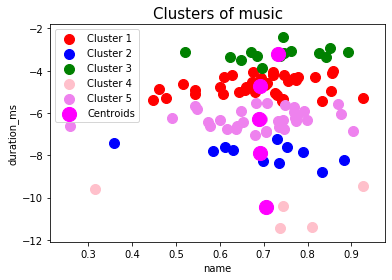

In [48]:
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'violet', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'magenta', label = 'Centroids')
plt.title('Clusters of music',fontsize=(15))
plt.xlabel('name')
plt.ylabel('duration_ms')
plt.legend()
plt.show()